# **Menentukan Pertanyaan Bisnis**
- Platform mana yang memiliki total penjualan global tertinggi sepanjang waktu?
- Genre game apa yang paling populer berdasarkan total penjualan global?
- Bagaimana tren penjualan video game secara global dari tahun ke tahun?
- Platform mana yang menjadi pemimpin penjualan setiap tahunnya sejak tahun 2000?
- Genre game apa yang paling populer di setiap wilayah (NA, EU, JP)?
- Bagaimana distribusi penjualan berdasarkan wilayah?
- Game apa yang memiliki penjualan tertinggi sepanjang masa?
- Bagaimana tren popularitas genre game dari tahun ke tahun?
- Publisher mana yang memiliki total penjualan tertinggi?

# **Mengimport Semua Packages/Library Digunakan**

In [1]:
# Library dataset untuk visualisasi Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

## Load Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("anandshaw2001/video-game-sales")

print("Path to dataset files:", path)

100%|██████████| 381k/381k [00:00<00:00, 13.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/video-game-sales/versions/1


In [3]:
# lihat isi dalam filenya
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(csv_files)

print('csv files ditemukan: ',csv_files)
# The error is likely due to the file having a different encoding.
# Specifying the encoding explicitly should solve the issue.
# Common encodings to try: 'latin-1', 'cp1252', 'iso-8859-1'
df = pd.read_csv(os.path.join(path, csv_files[0]), encoding='latin-1')  # or 'cp1252', 'iso-8859-1'
df

['vgsales.csv']
csv files ditemukan:  ['vgsales.csv']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Assessing Data

## melihat isi datanya

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Mencari duplikat data

In [5]:
print("data yang terduplikasi sebanyak: ",df.duplicated().sum())

data yang terduplikasi sebanyak:  0


## Mencari Missing value Data

In [6]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Melihat data yang terdapat outlier

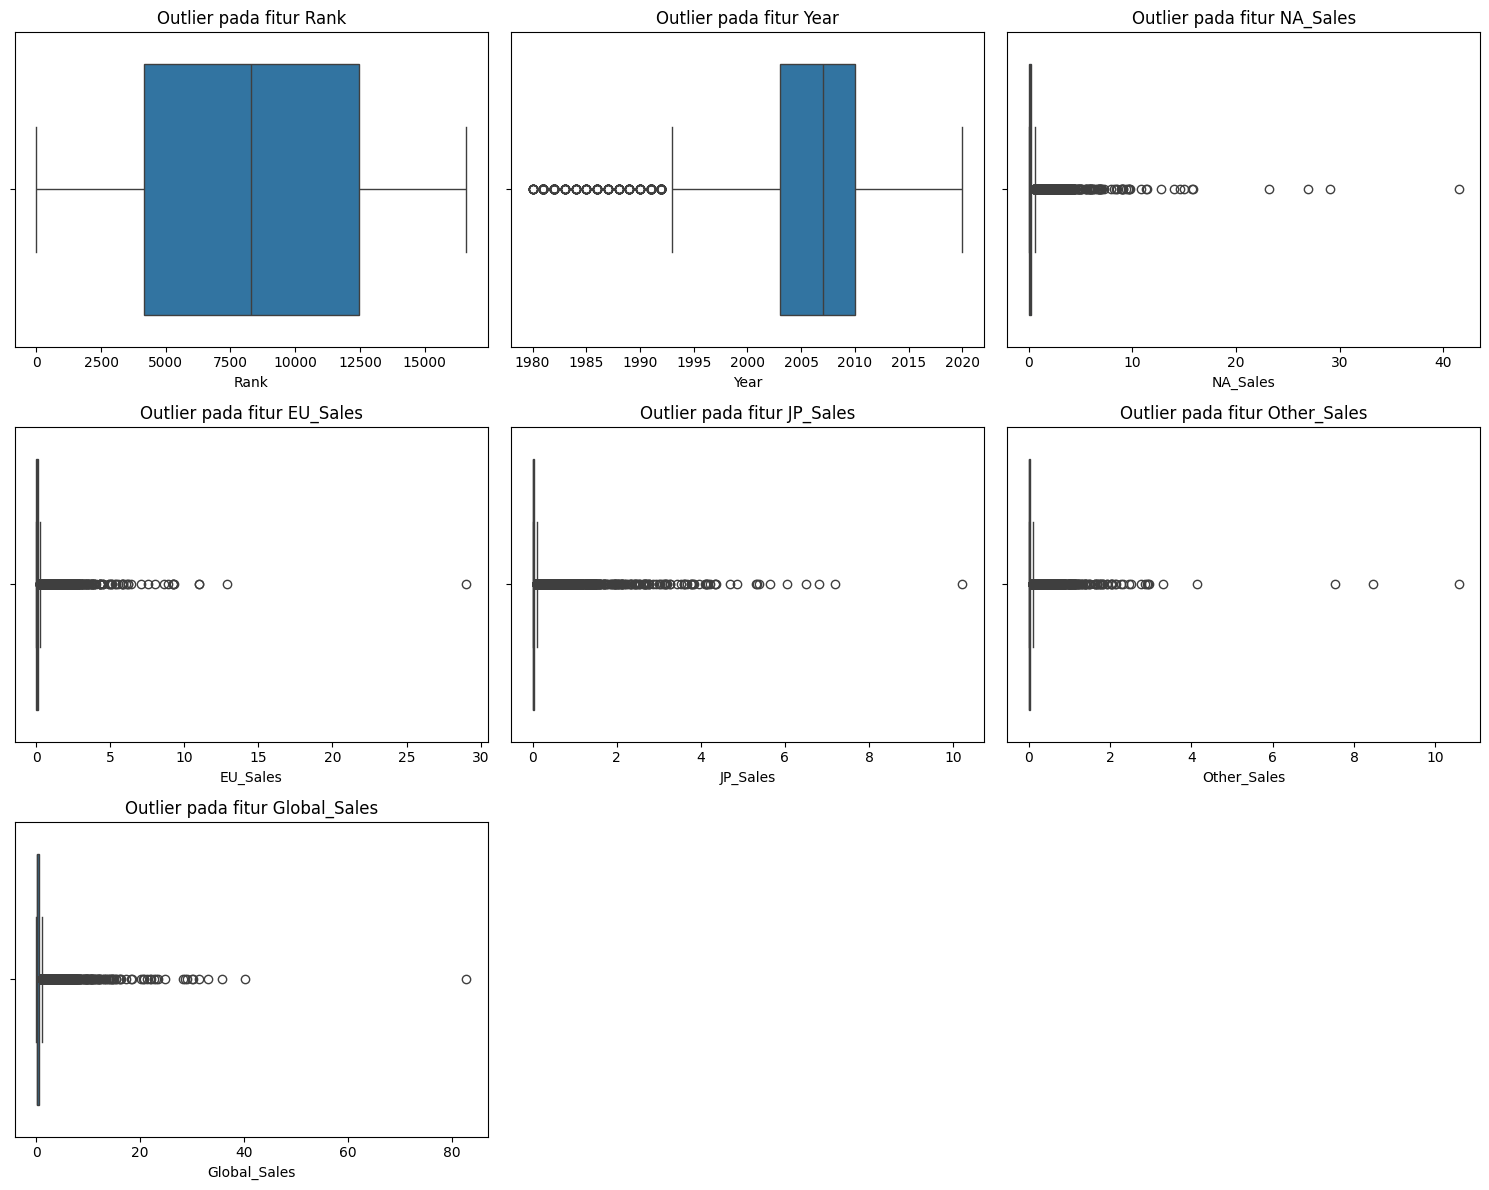

In [7]:
fitur_numerik=df.select_dtypes(include=["number"])
plt.figure(figsize=(15,12))
for i,feature in enumerate(fitur_numerik,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=fitur_numerik[feature])
    plt.title(f'Outlier pada fitur {feature}')

plt.tight_layout()
plt.show()

# Cleaning Data

## **mengisi data yang hilang pada year dan publisher**

In [8]:
df.Year.fillna(value=df.Year.median(),inplace=True)

df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [9]:
df.Publisher.fillna(value=df.Publisher.mode(),inplace=True)
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## mengubah data pada Year dengan tipe data float menjadi date

In [10]:
string_cols = df[['Publisher']]  # Creates a DataFrame with 'Publisher' column
for col in string_cols.columns:  # Iterates over columns in the DataFrame
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Menangani Data yang Memiliki Outlier

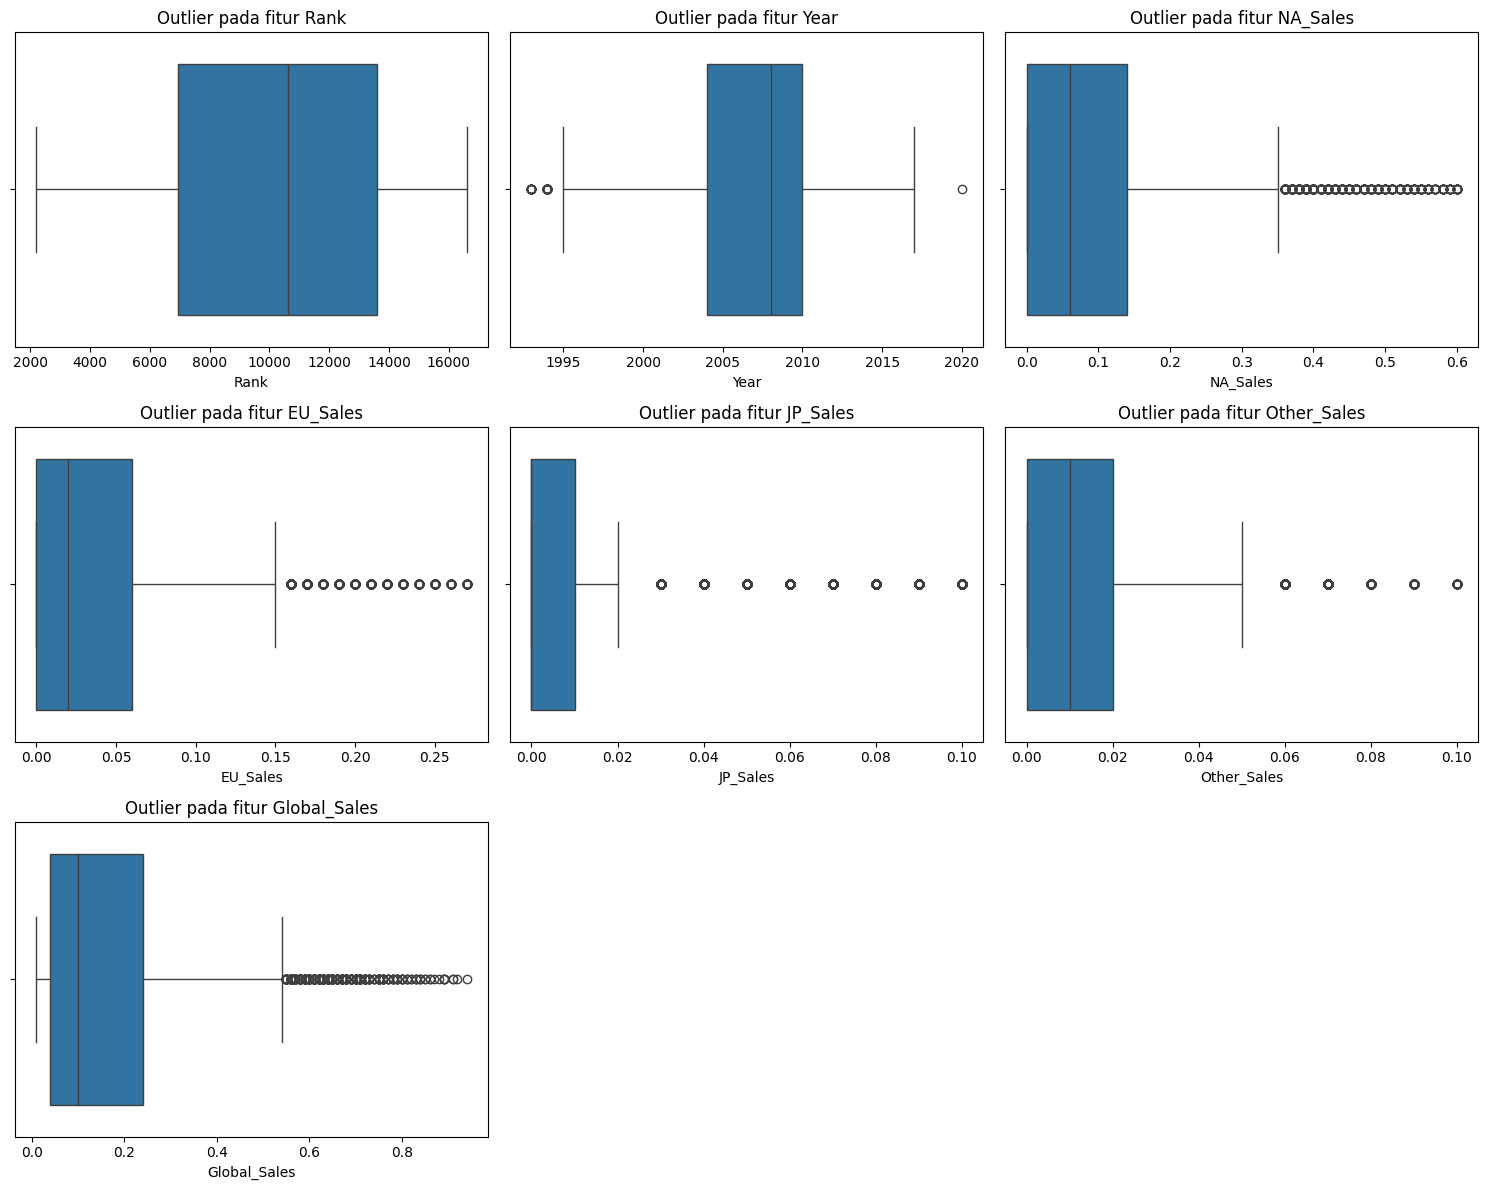

In [11]:
# Menghitung Q1, Q3, dan IQR
Q1 = fitur_numerik.quantile(0.25)
Q3 = fitur_numerik.quantile(0.75)
IQR = Q3 - Q1

# Filter untuk menghapus outlier
condition = ~((fitur_numerik < (Q1 - 1.5 * IQR)) | (fitur_numerik > (Q3 + 1.5 * IQR))).any(axis=1)
df_numerik_filter = fitur_numerik[condition]

plt.figure(figsize=(15,12))
for i,feature in enumerate(df_numerik_filter,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df_numerik_filter[feature])
    plt.title(f'Outlier pada fitur {feature}')

plt.tight_layout()
plt.show()


# Exploratory Data Analysis(EDA)

In [12]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1409,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.416134,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.781686,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [13]:
df.groupby(by="Genre").NA_Sales.nunique().sort_values(ascending=False)

,NA_Sales
Genre,
Action,221
Shooter,199
Sports,191
Platform,175
Misc,159
Racing,155
Role-Playing,146
Fighting,129
Simulation,117


In [14]:
df.groupby(by="Genre").EU_Sales.nunique().sort_values(ascending=False)

,EU_Sales
Genre,
Action,170
Shooter,152
Sports,139
Racing,125
Platform,120
Misc,118
Role-Playing,106
Simulation,93
Fighting,85


In [15]:
df.groupby(by='Genre').agg({
    "NA_Sales":['nunique','sum','max','min','count'],
    "EU_Sales":['nunique','sum','max','min','count'],
    "JP_Sales":['nunique','sum','max','min','count'],
    "Other_Sales":['nunique','sum','max','min','count'],
    "Global_Sales":['nunique','sum','max','min','count']
}).sort_index().T

Genre                  Action  Adventure  Fighting     Misc  Platform  Puzzle  \
NA_Sales     nunique   221.00      78.00    129.00   159.00    175.00   83.00   
             sum       877.83     105.80    223.59   410.24    447.05  123.78   
             max         9.63       6.16      6.75    14.97     29.08   23.20   
             min         0.00       0.00      0.00     0.00      0.00    0.00   
             count    3316.00    1286.00    848.00  1739.00    886.00  582.00   
EU_Sales     nunique   170.00      65.00     85.00   118.00    120.00   60.00   
             sum       525.00      64.13    101.32   215.98    201.63   50.78   
             max         9.27       2.79      2.61     9.26      9.23    5.36   
             min         0.00       0.00      0.00     0.00      0.00    0.00   
             count    3316.00    1286.00    848.00  1739.00    886.00  582.00   
JP_Sales     nunique    94.00      50.00     77.00    85.00    101.00   68.00   
             sum       159.95      52.07     87.35   107.76    130.77   57.31   
             max         3.96       2.69      2.87     4.16      6.81    5.32   
             min         0.00       0.00      0.00     0.00      0.00    0.00   
             count    3316.00    1286.00    848.00  1739.00    886.00  582.00   
Other_Sales  nunique    86.00      29.00     46.00    65.00     56.00   27.00   
             sum       187.38      16.81     36.68    75.32     51.59   12.55   
             max        10.57       0.83      1.41     2.85      2.90    1.18   
             min         0.00       0.00      0.00     0.00      0.00    0.00   
             count    3316.00    1286.00    848.00  1739.00    886.00  582.00   
Global_Sales nunique   324.00     121.00    178.00   222.00    239.00  126.00   
             sum      1751.18     239.04    448.91   809.96    831.37  244.95   
             max        21.40      11.18     13.04    29.02     40.24   30.26   
             min         0.01       0.01      0.01     0.01      0.01    0.01   
             count    3316.00    1286.00    848.00  1739.00    886.00  582.00   

Genre                  Racing  Role-Playing  Shooter  Simulation   Sports  \
NA_Sales     nunique   155.00        146.00   199.00      117.00   191.00   
             sum       359.42        327.28   582.60      183.31   683.35   
             max        15.85         11.27    26.93        9.07    41.49   
             min         0.00          0.00     0.00        0.00     0.00   
             count    1249.00       1488.00  1310.00      867.00  2346.00   
EU_Sales     nunique   125.00        106.00   152.00       93.00   139.00   
             sum       238.39        188.06   313.27      113.38   376.85   
             max        12.88          8.89     5.88       11.00    29.02   
             min         0.00          0.00     0.00        0.00     0.00   
             count    1249.00       1488.00  1310.00      867.00  2346.00   
JP_Sales     nunique    66.00        152.00    55.00       70.00    91.00   
             sum        56.69        352.31    38.28       63.70   135.37   
             max         4.13         10.22     1.44        5.33     3.77   
             min         0.00          0.00     0.00        0.00     0.00   
             count    1249.00       1488.00  1310.00      867.00  2346.00   
Other_Sales  nunique    62.00         62.00    83.00       39.00    78.00   
             sum        77.27         59.61   102.69       31.52   134.97   
             max         7.53          1.74     2.52        2.75     8.46   
             min         0.00          0.00     0.00        0.00     0.00   
             count    1249.00       1488.00  1310.00      867.00  2346.00   
Global_Sales nunique   218.00        246.00   270.00      166.00   273.00   
             sum       732.04        927.37  1037.37      392.20  1330.93   
             max        35.82         31.37    28.31       24.76    82.74   
             min         0.01          0.01  

In [16]:
#Melihat performa platform dalam penjualan
df.groupby("Platform").agg({
    "NA_Sales": "sum",
    "EU_Sales": "sum",
    "JP_Sales": "sum",
    "Other_Sales": "sum",
    "Global_Sales": "sum",
    "Rank": "mean"
}).sort_values("NA_Sales", ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank
Platform,,,,,,
X360,601.05,280.58,12.43,85.54,979.96,6692.528063
PS2,583.84,339.29,139.20,193.44,1255.64,7477.633966
Wii,507.71,268.38,69.35,80.61,926.71,7730.774340
PS3,392.26,343.71,79.99,141.93,957.84,6793.054929
DS,390.71,194.65,175.57,60.53,822.49,9637.462321
PS,336.51,213.60,139.82,40.91,730.66,6958.221572
GBA,187.54,75.25,47.33,7.73,318.50,8682.176399
XB,186.69,60.95,1.38,8.72,258.26,8761.257282
N64,139.02,41.06,34.22,4.38,218.88,6530.373041


In [17]:
# 3. Analisis tahunan: total penjualan per tahun
df.groupby("Year").agg({
    "NA_Sales": "sum",
    "EU_Sales": "sum",
    "JP_Sales": "sum",
    "Other_Sales": "sum",
    "Global_Sales": "sum"
}).sort_index()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


In [18]:
df.groupby("Publisher").agg({
    "Name": "count"
}).rename(columns={"Name": "Total_Games"}).sort_values("Total_Games", ascending=False)

,Total_Games
Publisher,
Electronic Arts,1409
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
iWin,1
fonfun,1
Valve,1


In [19]:
df.groupby('Name').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,'98 Koshien,0.15,0.10,0.12,0.03,0.41
1,.hack//G.U. Vol.1//Rebirth,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...
11488,thinkSMART: Chess for Kids,0.01,0.00,0.00,0.00,0.01
11489,uDraw Studio,1.67,0.58,0.00,0.20,2.46
11490,uDraw Studio: Instant Artist,0.09,0.10,0.00,0.02,0.21
11491,wwe Smackdown vs. Raw 2006,1.57,1.02,0.00,0.41,3.00


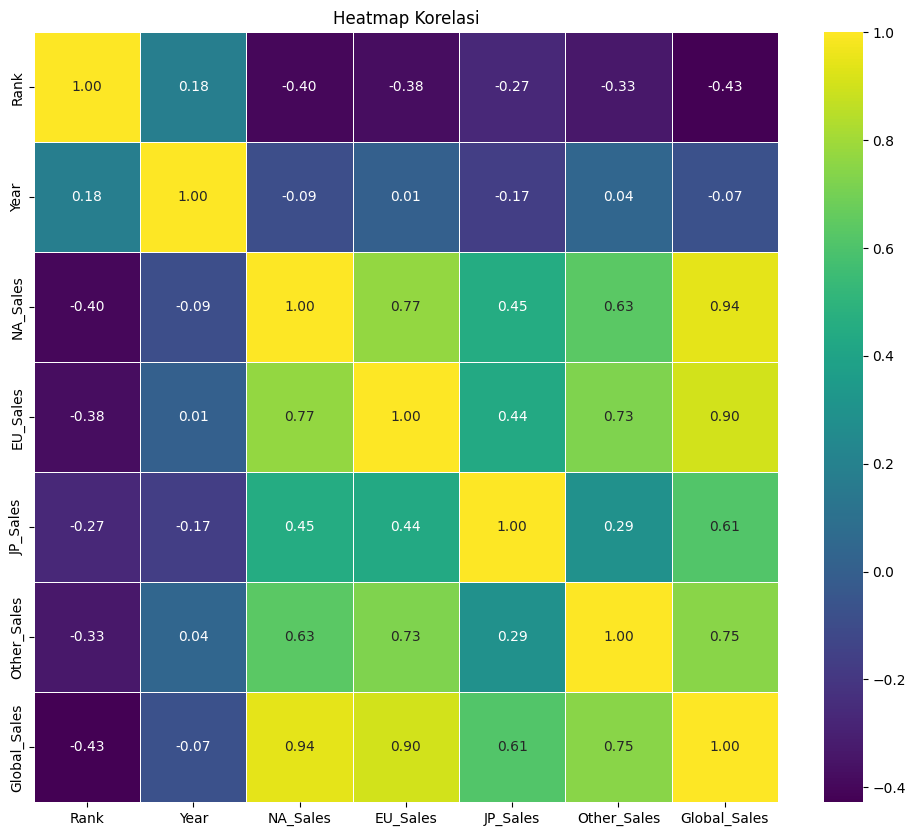

In [20]:
fitur_numerik=df.select_dtypes(include=['number'])
# Heatmap korelasi untuk fitur numerikal
plt.figure(figsize=(12, 10))
correlation_matrix = fitur_numerik.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## 📊 Insight dari Heatmap Korelasi
### 🔎 **Interpretasi Korelasi:**
Heatmap ini menunjukkan korelasi antar fitur numerik dalam dataset, dengan nilai antara -1 hingga 1:**

- 1: Korelasi sempurna positif

- -1: Korelasi sempurna negatif

- 0: Tidak ada korelasi

### ✅ **Korelasi Positif Kuat:**
- Global_Sales vs NA_Sales: 0.94

- Global_Sales vs EU_Sales: 0.90

- Global_Sales vs Other_Sales: 0.75

- NA_Sales vs EU_Sales: 0.77

Ini menunjukkan bahwa penjualan global sangat dipengaruhi oleh penjualan di wilayah NA, EU, dan wilayah lainnya.

### ⚠️ **Korelasi Lemah atau Negatif:**
Rank vs semua fitur penjualan memiliki korelasi negatif sedang:

- Rank vs Global_Sales: -0.43

- Rank vs NA_Sales: -0.40

- Rank vs EU_Sales: -0.38

Artinya, semakin tinggi penjualan, semakin rendah nilai Rank-nya, yang logis jika Rank = 1 adalah peringkat tertinggi.

Year memiliki korelasi sangat rendah dengan semua variabel penjualan (antara -0.17 hingga 0.04), menunjukkan bahwa tahun rilis game tidak memiliki hubungan kuat dengan performa penjualannya.

# Visualization & Explanatory Analysis

## 1. Platform mana yang memiliki total penjualan global tertinggi sepanjang waktu?

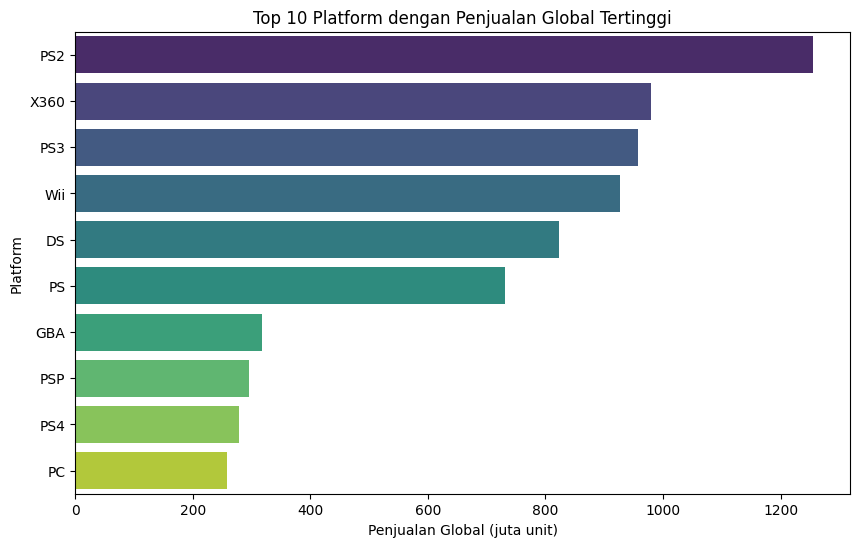

In [21]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='viridis')
plt.title("Top 10 Platform dengan Penjualan Global Tertinggi")
plt.xlabel("Penjualan Global (juta unit)")
plt.ylabel("Platform")
plt.show()

## 🎮 **Insight: Top 10 Platform dengan Penjualan Global Tertinggi**

### 📌 **Visualisasi menunjukkan total unit terjual (dalam jutaan) berdasarkan platform game.**

🥇 **Platform dengan Penjualan Global Tertinggi:**
- PS2 memimpin dengan penjualan tertinggi secara global, lebih dari 1200 juta unit.

- Diikuti oleh X360 (Xbox 360) dan PS3, yang juga memiliki angka penjualan mendekati 1000 juta unit.

🔍 **Persaingan Konsol:**
- Sony mendominasi daftar ini dengan 5 platform (PS2, PS3, PS, PSP, PS4) dalam 10 besar.

- Nintendo juga sangat kuat dengan Wii, DS, dan GBA muncul di daftar.

- Xbox 360 (Microsoft) menjadi satu-satunya wakil Microsoft yang bersaing ketat di papan atas.

💻 **Platform PC:**
- Meskipun PC adalah platform terbuka dan sangat luas, secara mengejutkan hanya berada di posisi terakhir dari 10 besar dalam hal total penjualan game global. Hal ini bisa jadi karena distribusi yang tersebar, atau dominasi game digital yang sulit dilacak dibandingkan konsol fisik.

## 2. Genre game apa yang paling populer berdasarkan total penjualan global?

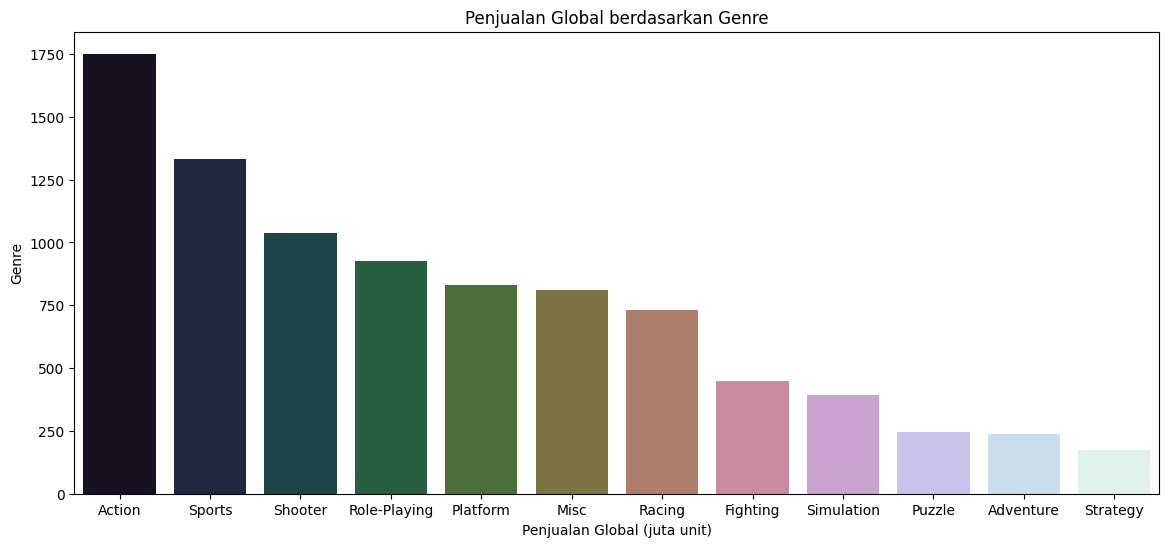

In [30]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(y=genre_sales.values, x=genre_sales.index, palette='cubehelix')
plt.title("Penjualan Global berdasarkan Genre")
plt.xlabel("Penjualan Global (juta unit)")
plt.ylabel("Genre")
plt.show()

## 🎮 **Insight: Penjualan Global Berdasarkan Genre Game**
- 📌 Visualisasi ini menampilkan total penjualan (dalam juta unit) dari masing-masing genre game di seluruh dunia.
- 🥇 **Genre dengan Penjualan Tertinggi:**
 - Action adalah genre paling populer secara global, dengan penjualan tertinggi melebihi 1750 juta unit.

**Diikuti oleh:**

- Sports (~1350 juta unit)

- Shooter (~1050 juta unit)

- Role-Playing (~950 juta unit)

### **📉 Genre Kurang Populer:**
**Genre dengan penjualan terendah:**

- Strategy, Adventure, dan Puzzle — masing-masing dengan kurang dari 300 juta unit.

- Genre seperti Simulation dan Fighting juga tergolong rendah dalam penjualan jika dibandingkan genre utama lainnya.

### 🔍 **Pola yang Terlihat:**
- Genre dengan gameplay cepat, kompetitif, dan mudah diakses seperti Action, Sports, dan Shooter mendominasi pasar.

- Genre yang lebih niche atau memerlukan waktu bermain panjang seperti Strategy dan Adventure memiliki pasar yang lebih terbatas.



## 3. Bagaimana tren penjualan video game secara global dari tahun ke tahun?

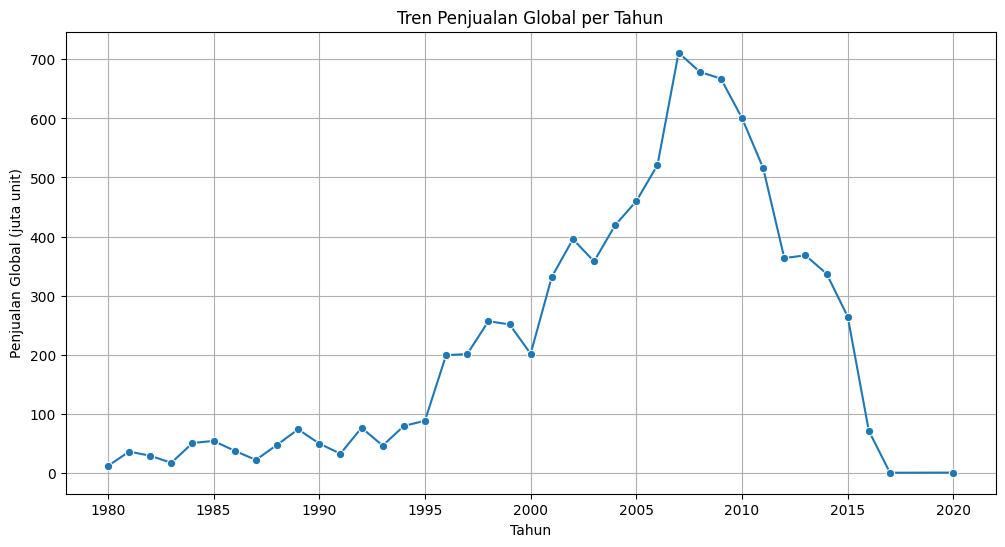

In [23]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum().dropna()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title("Tren Penjualan Global per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Penjualan Global (juta unit)")
plt.grid(True)
plt.show()

## **📈 Insight: Tren Penjualan Global Video Game per Tahun**
- 📌 Grafik menunjukkan total penjualan global (dalam juta unit) setiap tahun sejak 1980 hingga 2020.
### 🕰️ **Fase Pertumbuhan dan Puncak:**
- Penjualan mulai meningkat signifikan sejak pertengahan 1990-an, kemungkinan dipicu oleh konsol generasi kelima seperti PS1 dan Nintendo 64.

Puncak penjualan terjadi sekitar tahun 2008, dengan angka melebihi 700 juta unit.

Periode 2005–2010 merupakan masa keemasan industri game dari sisi penjualan global.

### 📉 **Penurunan Setelah 2010:**
Setelah 2010, terjadi penurunan tajam dan konsisten dalam penjualan.

Tahun 2016 ke bawah menunjukkan penurunan drastis, hingga hampir nol pada tahun 2020.

### 🔍 **Interpretasi Kemungkinan:**
**Penurunan penjualan fisik mungkin disebabkan oleh:**

- Peralihan ke distribusi digital (Steam, PlayStation Store, Xbox Live).

- Bergesernya pasar ke mobile gaming yang tidak tercakup dalam dataset ini.

- Perubahan perilaku konsumen: lebih banyak bermain game yang sifatnya layanan (Games as a Service) dibandingkan membeli fisik per judul.



## 4. Platform mana yang menjadi pemimpin penjualan setiap tahunnya?

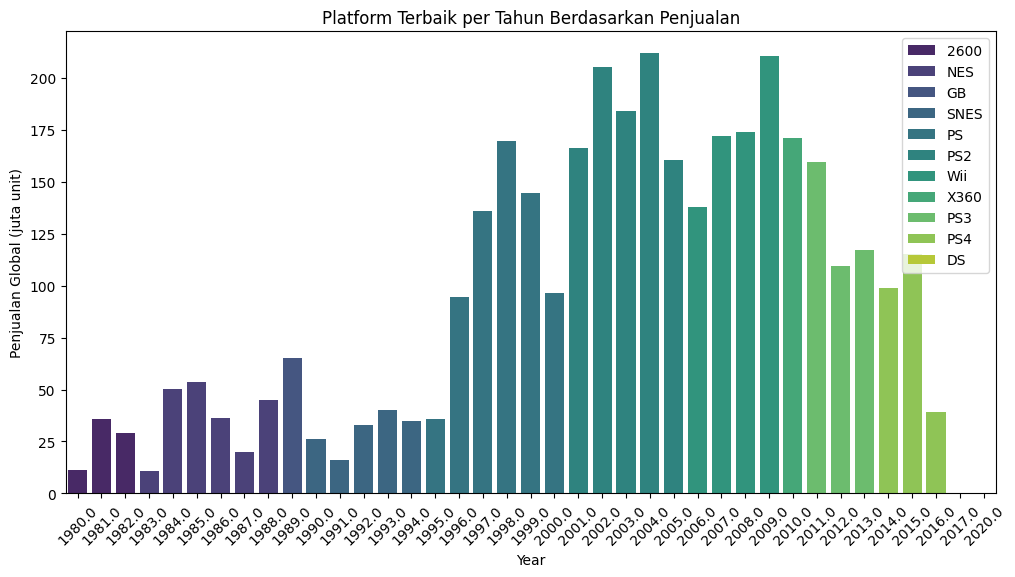

In [24]:
top_platform_per_year = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
top_per_year = top_platform_per_year.sort_values('Global_Sales', ascending=False).drop_duplicates('Year')

plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Global_Sales', hue='Platform', data=top_per_year,palette='viridis')
plt.title("Platform Terbaik per Tahun Berdasarkan Penjualan")
plt.ylabel("Penjualan Global (juta unit)")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

## 🕹️ **Insight: Platform Terbaik per Tahun Berdasarkan Penjualan Global**
### 📊 **Visualisasi ini menunjukkan platform game dengan penjualan tertinggi setiap tahunnya dari tahun 1980 hingga 2020.**
#### 🔁 **Pergeseran Dominasi Platform:**
- **1980–1990:** Platform seperti Atari 2600, NES, GB, dan SNES mendominasi awal pertumbuhan industri game.

- **1995–2005:** Transisi ke konsol 3D seperti PlayStation (PS1 & PS2), yang membawa lonjakan besar dalam penjualan global.

- **PS2** menjadi platform dengan penjualan tertinggi dan bertahan sebagai dominator selama beberapa tahun berturut-turut.

- **2006–2012:** Munculnya persaingan kuat antara Wii, Xbox 360, dan PS3 dengan kontribusi signifikan terhadap penjualan tahunan.

- **2013–2016:** PS4 dan Nintendo DS mulai mendominasi tahun-tahun ini dengan penjualan yang masih tinggi meski tren industri mulai menurun.

#### 📉 **Penurunan Pasca-2016:**
Setelah tahun 2016, tidak ada platform baru yang muncul sebagai dominan secara signifikan dalam penjualan fisik, mengindikasikan pergeseran ke penjualan digital atau game berbasis layanan.

#### 🎯 **Insight Penting:**
- PS2 merupakan platform paling dominan dalam sejarah, baik dari sisi jumlah tahun mendominasi maupun volume penjualan.

- Persaingan antar-platform sangat dinamis, mengikuti siklus generasi konsol yang berkisar setiap 5–7 tahun.

- Platform Nintendo (NES, SNES, GB, Wii, DS) konsisten muncul sebagai top performer dalam beberapa generasi berbeda.

- Transisi teknologi dan perilaku pengguna memengaruhi perubahan dominasi platform dari waktu ke waktu.

## 5. Genre game apa yang paling populer di setiap wilayah (NA, EU, JP)?

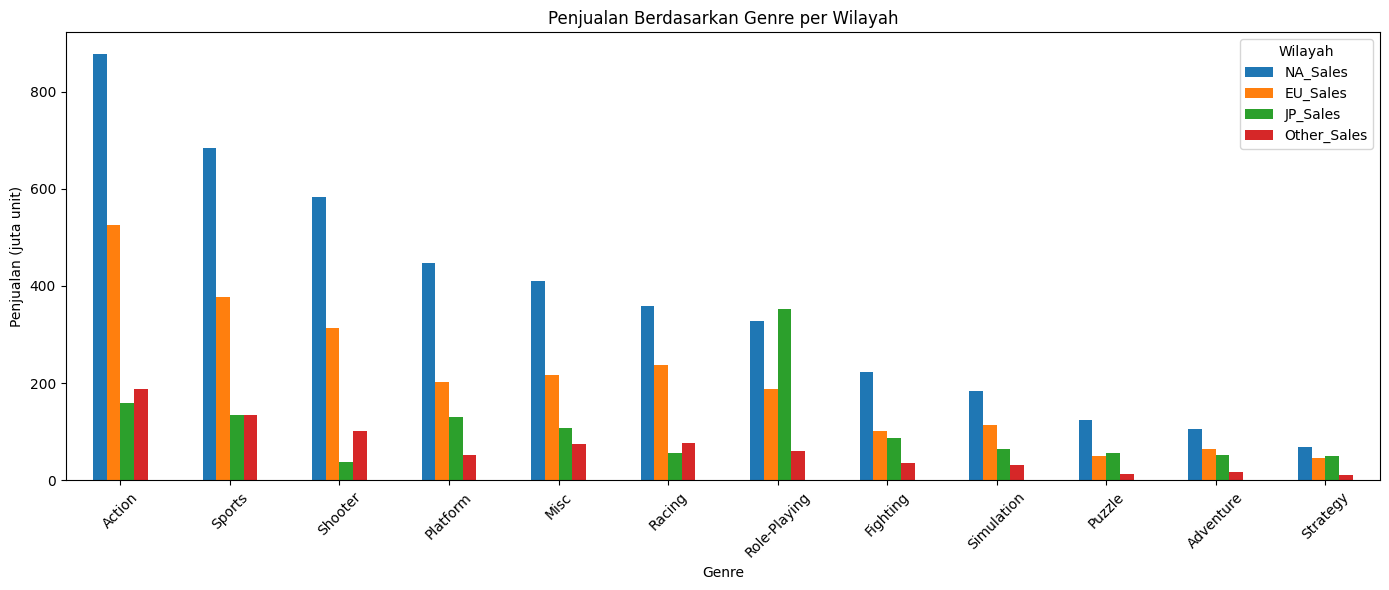

In [25]:
region_genres = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().sort_values('NA_Sales', ascending=False)

region_genres.plot(kind='bar', figsize=(14,6))
plt.title("Penjualan Berdasarkan Genre per Wilayah")
plt.xlabel("Genre")
plt.ylabel("Penjualan (juta unit)")
plt.xticks(rotation=45)
plt.legend(title="Wilayah")
plt.tight_layout()
plt.show()


## 🌍 **Insight: Penjualan Game Berdasarkan Genre dan Wilayah**
### 📊 **Visualisasi ini membandingkan penjualan berbagai genre game di empat wilayah utama: Amerika Utara (NA), Eropa (EU), Jepang (JP), dan wilayah lainnya (Other).**
#### **🏆 Genre Terpopuler di Setiap Wilayah:**
- **Amerika Utara (NA):**

 - Mendominasi penjualan di hampir semua genre.

 - Genre paling populer: Action, diikuti oleh Sports dan Shooter.

- **Eropa (EU):**

 - Pola preferensi mirip dengan NA, tetapi volume penjualannya lebih rendah.

 - Genre paling laris: Action, kemudian Sports dan Shooter.

- **Jepang (JP):**

 - Sangat berbeda dari NA dan EU.

 - Role-Playing adalah genre paling dominan, melampaui Action dan Platform.

 - Menunjukkan preferensi budaya yang unik terhadap game berbasis cerita dan strategi.

- **Wilayah Lain (Other):**

 - Penjualan relatif kecil dibanding tiga wilayah utama.

 - Action dan Sports tetap genre yang mendominasi.

#### **🎯 Insight Penting:**
 - Action adalah genre global yang paling laris secara keseluruhan di semua wilayah kecuali Jepang.

 - Role-Playing sangat kuat di Jepang, bahkan mengungguli Action di wilayah tersebut.

 - Shooter dan Sports menunjukkan dominasi di pasar Barat (NA dan EU), tetapi kurang populer di Jepang.

 - Genre seperti Puzzle, Adventure, dan Strategy memiliki penjualan rendah di seluruh wilayah, mengindikasikan pasar niche.

## 6. Bagaimana distribusi penjualan berdasarkan wilayah?

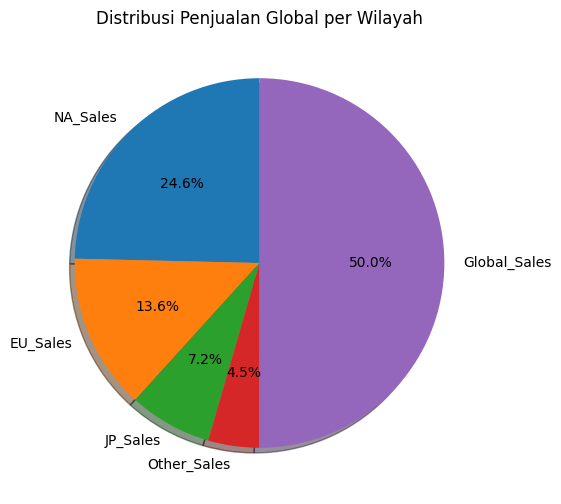

In [26]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']
region_totals = df[regions].sum()

plt.figure(figsize=(8,6))
region_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribusi Penjualan Global per Wilayah")
plt.ylabel("")
plt.show()

## 🌐 **Insight: Distribusi Penjualan Global per Wilayah**
### 📊 **Diagram pie ini menunjukkan proporsi kontribusi penjualan dari berbagai wilayah terhadap total penjualan global game.**
#### **📌 Rincian Distribusi:**
- **Amerika Utara (NA_Sales): 🟦 24.6%**

 - Merupakan kontributor terbesar terhadap penjualan global setelah total agregat.

- **Eropa (EU_Sales): 🟧 13.6%**

 - Menempati urutan kedua, menunjukkan pasar game yang cukup kuat.

- **Jepang (JP_Sales): 🟩 7.2%**

 - Lebih kecil dari NA dan EU, namun tetap signifikan, terutama dengan genre yang khas seperti Role-Playing.

- **Wilayah Lain (Other_Sales): 🟥 4.5%**

 - Kontribusi paling kecil terhadap penjualan global.

- **Global_Sales: 🟪 50.0%**

 - Total keseluruhan dari semua wilayah, digunakan sebagai acuan untuk membandingkan distribusi.

#### **🎯 Insight Penting:**
- Pasar Amerika Utara adalah yang paling dominan, hampir menyumbang setengah dari penjualan non-agregat.

- Eropa juga merupakan pasar besar, tetapi masih tertinggal dibandingkan NA.

- Pasar Jepang lebih kecil secara volume, tetapi seperti pada grafik sebelumnya, memiliki preferensi genre yang sangat khas.

- Wilayah lain memiliki potensi pertumbuhan, tetapi kontribusi saat ini masih kecil.

#### **🧠 Kesimpulan Strategis:**
Pengembang dan distributor game sebaiknya memfokuskan strategi pemasaran mereka ke:

- Amerika Utara dan Eropa untuk volume penjualan besar,

- Jepang dengan pendekatan yang disesuaikan secara budaya,

- Wilayah lainnya sebagai potensi ekspansi masa depan.

## 7. Game apa yang memiliki penjualan tertinggi sepanjang masa?

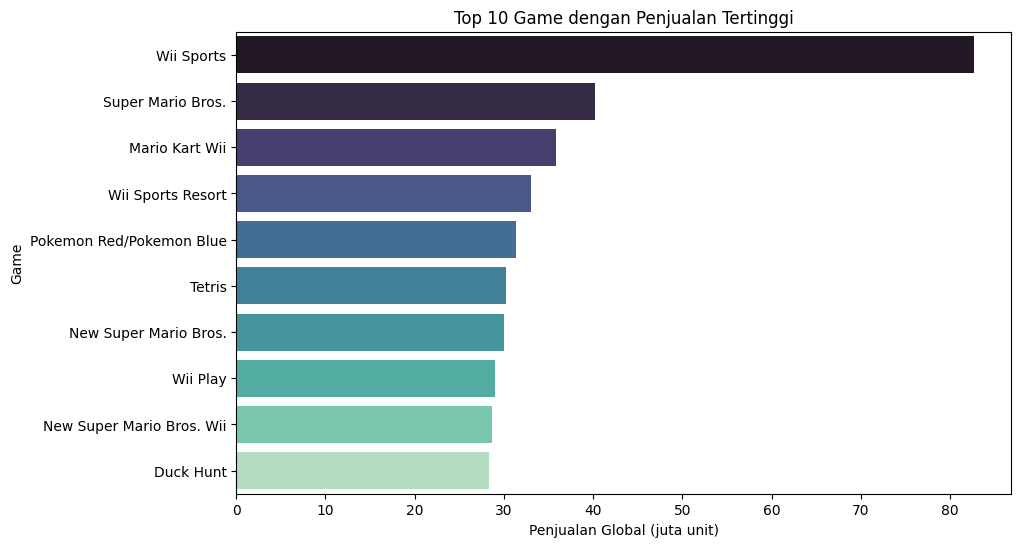

In [27]:
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='mako')
plt.title("Top 10 Game dengan Penjualan Tertinggi")
plt.xlabel("Penjualan Global (juta unit)")
plt.ylabel("Game")
plt.show()

## 🏆 **Insight: Top 10 Game dengan Penjualan Global Tertinggi**
### 📊 **Visualisasi ini menunjukkan 10 besar game dengan penjualan global terbanyak (dalam juta unit).**
#### 🎮 **Daftar Game Terlaris:**
1. **Wii Sports–** ~82 juta unit

2. **Super Mario Bros.–** ~40 juta unit

3. **Mario Kart Wii–** ~35 juta unit

4. **Wii Sports Resort–** ~33 juta unit

5. **Pokémon Red/Pokémon Blue–** ~32 juta unit

6. **Tetris–** ~30 juta unit

7. **New Super Mario Bros.–** ~30 juta unit

8. **Wii Play–** ~29 juta unit

9. **New Super Mario Bros. Wii–** ~29 juta unit

10. **Duck Hunt–** ~28 juta unit

#### 🧠 **Insight Penting:**
- Nintendo mendominasi daftar ini, menunjukkan kekuatan IP mereka seperti Mario, Pokémon, dan Tetris.

- Game dengan branding “Wii” memiliki representasi kuat, mengindikasikan kesuksesan besar konsol Wii dalam menarik pasar massal.

- Sebagian besar game dalam daftar ini adalah game keluarga atau game dengan gameplay sederhana, menunjukkan minat pasar luas terhadap game yang mudah diakses.

#### 🎯 **Kesimpulan Strategis:**
- Fokus pada franchise besar dan ikonik seperti Mario, Pokémon, dan Tetris dapat memberikan keuntungan jangka panjang.

- Pengalaman multiplayer dan game keluarga (seperti Wii Sports) terbukti sangat diminati dan menghasilkan penjualan besar.

- Konsistensi dan inovasi dalam waralaba lama terbukti efektif dalam mempertahankan minat pasar.

## 8. Bagaimana tren popularitas genre game dari tahun ke tahun?

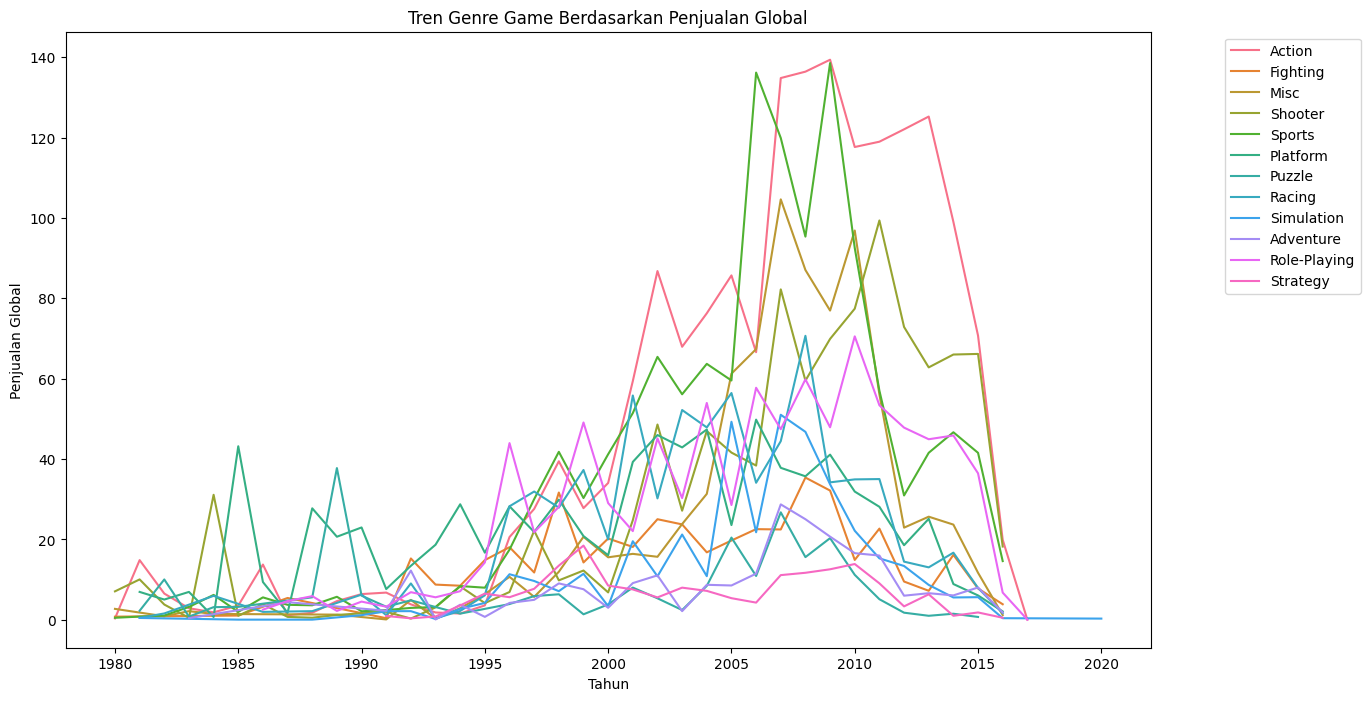

In [28]:
genre_trend = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14,8))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=genre_trend)
plt.title("Tren Genre Game Berdasarkan Penjualan Global")
plt.xlabel("Tahun")
plt.ylabel("Penjualan Global")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

## 📈 **Insight: Tren Genre Game Berdasarkan Penjualan Global**
### 📊 **Grafik ini menunjukkan perubahan tren penjualan global berdasarkan genre game dari tahun 1980 hingga 2020.**
#### **🧠 Insight Penting:**
- **Genre Action** mengalami lonjakan tertinggi di sekitar tahun 2008 dan menjadi genre paling dominan dari segi penjualan global.

- **Shooter dan Sports** juga menunjukkan performa tinggi, terutama setelah tahun 2005 hingga sekitar 2012.

- **Role-Playing dan Platform** mengalami puncak penjualan di awal 2000-an, tetapi trennya cenderung menurun setelah 2010.

- **Genre Puzzle, Racing, dan Fighting** cenderung memiliki puncak kecil dan tidak konsisten, menandakan pasar yang lebih niche.

- Setelah 2015, hampir semua genre mengalami penurunan drastis dalam penjualan, kemungkinan karena pergeseran ke platform digital atau metode distribusi yang berbeda (misalnya game mobile, digital store, atau subscription-based).

#### 🎯 **Kesimpulan Strategis:**
- Action, Shooter, dan Sports adalah genre yang paling stabil dan mendominasi pasar selama satu dekade terakhir sebelum penurunan umum.

- Perusahaan game perlu memperhatikan tren digitalisasi dan transformasi industri setelah 2015.

- Inovasi dan pendekatan baru dalam genre tradisional seperti Role-Playing dan Platform bisa menjadi strategi menarik untuk membangkitkan kembali minat pasar.

## 9. Publisher mana yang memiliki total penjualan tertinggi?

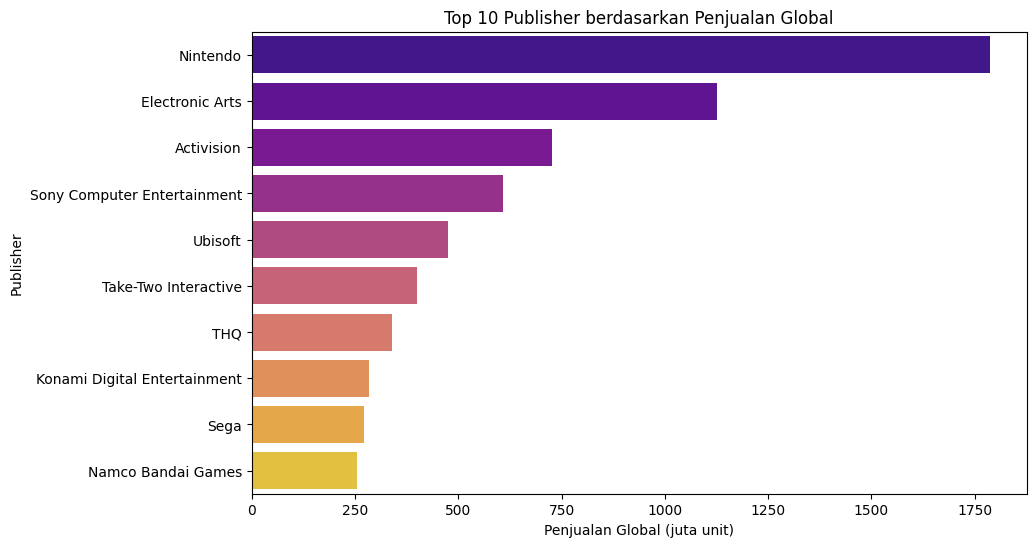

In [29]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='plasma')
plt.title("Top 10 Publisher berdasarkan Penjualan Global")
plt.xlabel("Penjualan Global (juta unit)")
plt.ylabel("Publisher")
plt.show()

## 📊 **Insight dari Visualisasi: Top 10 Publisher berdasarkan Penjualan Global**
### Deskripsi Visualisasi
Grafik batang horizontal menampilkan 10 publisher video game teratas berdasarkan total penjualan global (dalam juta unit). Warna batang menggunakan gradasi dari ungu ke kuning, mencerminkan perbedaan volume penjualan.

### Insight Utama
1. Nintendo mendominasi pasar, dengan total penjualan global tertinggi dibandingkan publisher lain jauh melampaui pesaingnya.

2. Electronic Arts dan Activision berada di posisi kedua dan ketiga, menunjukkan peran penting mereka dalam industri game global.

3. Publisher asal Jepang seperti Nintendo, Sony Computer Entertainment, dan Konami menunjukkan kekuatan besar dalam pasar global, menandakan dominasi Asia Timur dalam pengembangan game.

4. Publisher besar lain seperti Ubisoft (Prancis) dan Take-Two Interactive (AS) juga termasuk dalam daftar ini, menunjukkan penyebaran geografis industri.

5. Terdapat gap yang cukup besar antara tiga teratas dan sisanya, menunjukkan konsentrasi pasar yang tinggi di tangan beberapa perusahaan besar.

# Kesimpulan

## 📘 **Kesimpulan dari Analisis Data Penjualan Video Game**
### 📌 Fokus Pertanyaan Bisnis
Notebook ini berupaya menjawab berbagai pertanyaan penting dalam industri video game, seperti:

- Platform dengan penjualan global tertinggi sepanjang masa.

- Genre game paling populer secara global dan di tiap wilayah (NA, EU, JP).

- Tren penjualan video game dari waktu ke waktu.

- Publisher dan game dengan penjualan tertinggi.

- Distribusi penjualan berdasarkan wilayah.

### **🗃️ Data yang Digunakan**
- Dataset utama: vgsales.csv dari repositori Kaggle anandshaw2001/video-game-sales.

- Dataset berisi informasi penjualan video game, termasuk:

 - Nama game, platform, genre, publisher

 - Penjualan di wilayah NA, EU, JP, dan global

 - Tahun rilis

### 🔍 **Proses Analisis**
Notebook ini memuat tahapan lengkap seperti:

- Import library (Pandas, Seaborn, Matplotlib)

- Proses data wrangling dan cleaning

- Visualisasi untuk menjawab berbagai pertanyaan bisnis

### 💡 **Kesimpulan Awal dari Tujuan Analisis**
Analisis ini bertujuan untuk:

- Mengidentifikasi pemain dominan dalam industri video game (platform & publisher)

- Menemukan tren dan preferensi regional terhadap genre dan game

- Mengungkap perubahan minat pasar dari tahun ke tahun